In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
sns.set(style = "whitegrid", color_codes = True)
sns.set(font_scale = 1)
#from astropy.table import Table, Column
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cross_validation import StratifiedKFold, cross_val_score, KFold
from sklearn.naive_bayes import BernoulliNB
#import xgboost as xgb

from xgboost import XGBRegressor, XGBClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import make_pipeline, make_union
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn import clone

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.metrics import log_loss, roc_auc_score, roc_curve, mean_squared_error
import pickle
import random
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

%load_ext autotime

/home/tu/miniconda3/envs/myenv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

ImportError: No module named 'plotly'

time: 289 ms


In [2]:
from lightgbm import sklearn as lgbmsk
from lightgbm import LGBMRegressor, LGBMClassifier

time: 194 ms


Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.

In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. 

The target columns signifies whether or not a claim was filed for that policy holder.

In [3]:
#Import training data
train = pd.read_csv("data/train.csv")
#Import test data
test = pd.read_csv("data/test.csv")

time: 8.73 s


In [9]:
train.shape

(595212, 59)

time: 1.66 s


In [10]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


time: 2.99 s


## Missing data

In [36]:
(train == -1).mean().sort_values(ascending = False)

ps_car_03_cat     0.690898
ps_car_05_cat     0.447825
ps_reg_03         0.181065
ps_car_14         0.071605
ps_car_07_cat     0.019302
ps_ind_05_cat     0.009760
ps_car_09_cat     0.000956
ps_ind_02_cat     0.000363
ps_car_01_cat     0.000180
ps_ind_04_cat     0.000139
ps_car_02_cat     0.000008
ps_car_11         0.000008
ps_car_12         0.000002
ps_ind_03         0.000000
ps_ind_18_bin     0.000000
target            0.000000
ps_ind_01         0.000000
ps_reg_02         0.000000
ps_reg_01         0.000000
ps_ind_16_bin     0.000000
ps_ind_17_bin     0.000000
ps_ind_15         0.000000
ps_car_04_cat     0.000000
ps_ind_13_bin     0.000000
ps_ind_12_bin     0.000000
ps_ind_11_bin     0.000000
ps_ind_10_bin     0.000000
ps_ind_09_bin     0.000000
ps_ind_08_bin     0.000000
ps_ind_07_bin     0.000000
ps_ind_06_bin     0.000000
ps_ind_14         0.000000
ps_calc_20_bin    0.000000
ps_car_06_cat     0.000000
ps_calc_19_bin    0.000000
ps_calc_18_bin    0.000000
ps_calc_17_bin    0.000000
p

time: 613 ms


In [5]:
train[['ps_car_13', 'ps_ind_03', 'ps_ind_05_cat','ps_ind_15','ps_reg_01','target']] 

,ps_car_13,ps_ind_03,ps_ind_05_cat,ps_ind_15,ps_reg_01,target
0,0.883679,5,0,11,0.7,0
1,0.618817,7,0,3,0.8,0
2,0.641586,9,0,12,0.0,0
3,0.542949,2,0,8,0.9,0
4,0.565832,0,0,9,0.7,0
5,0.879049,4,0,6,0.9,0
6,0.639683,3,0,8,0.6,0
7,0.900574,4,0,13,0.7,0
8,0.780641,3,0,6,0.9,0
9,1.458184,2,0,4,0.9,1


time: 472 ms


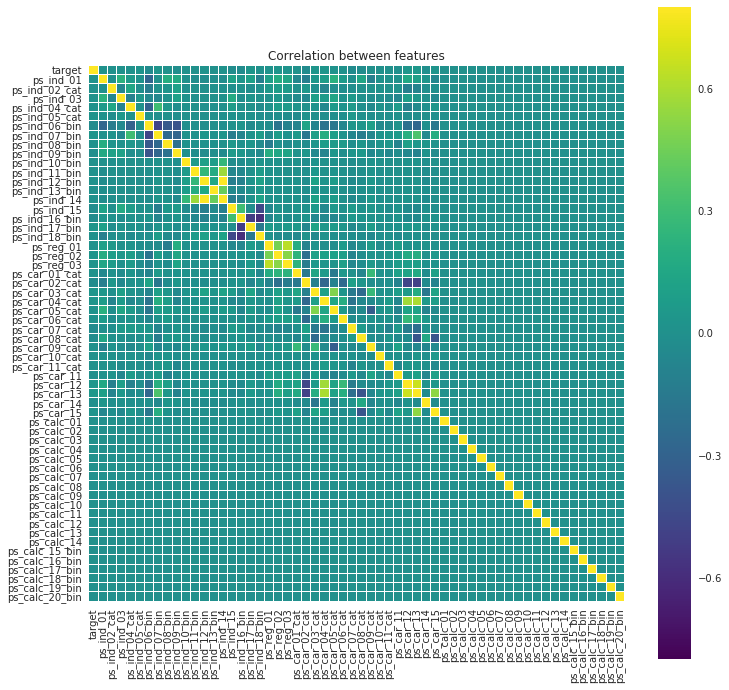

time: 7.15 s


In [8]:
corrMatrix = train.select_dtypes(include = ['Float64','int64']).iloc[:,1:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix,vmax = .8, linewidths = 0.01, square = True, cmap = 'viridis', linecolor ='white')
plt.title('Correlation between features')

## Explore target

In [16]:
train.target.value_counts(normalize= True)

0    0.963552
1    0.036448
Name: target, dtype: float64

time: 15.7 ms


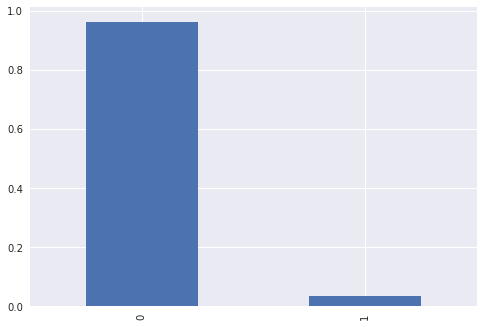

time: 338 ms


In [17]:
train.target.value_counts(normalize= True).plot(kind= 'bar')

### => Imbalanced distribution target problem
We can handle it by using Xgboost

## Explore categorical data

In [9]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


time: 11 ms


In [52]:
CAT = []
for col in train.columns:
    if 'cat' in col:
        CAT.append(col)
        
BIN = []
for col in train.columns:
    if 'bin' in col:
        BIN.append(col)

time: 4.63 ms


In [26]:
CAT

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

time: 7 ms


In [22]:
BIN

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

time: 13 ms


In [37]:
(train[CAT] == -1).mean().sort_values(ascending = False)

ps_car_03_cat    0.690898
ps_car_05_cat    0.447825
ps_car_07_cat    0.019302
ps_ind_05_cat    0.009760
ps_car_09_cat    0.000956
ps_ind_02_cat    0.000363
ps_car_01_cat    0.000180
ps_ind_04_cat    0.000139
ps_car_02_cat    0.000008
ps_car_11_cat    0.000000
ps_car_10_cat    0.000000
ps_car_08_cat    0.000000
ps_car_06_cat    0.000000
ps_car_04_cat    0.000000
dtype: float64

time: 204 ms


In [22]:
train[['ps_ind_02_cat','target']].groupby(['ps_ind_02_cat'],as_index= False).mean().sort_values(by='target', ascending = False)

,ps_ind_02_cat,target
0,-1,0.185185
4,4,0.040780
2,2,0.038139
3,3,0.037217
1,1,0.035725


time: 208 ms


In [54]:
train[['ps_ind_05_cat','target']].groupby(['ps_ind_05_cat'],as_index= False).mean().sort_values(by='target', ascending = False)

,ps_ind_05_cat,target
0,-1,0.083319
3,2,0.075526
7,6,0.059336
5,4,0.052061
6,5,0.048514
2,1,0.047825
4,3,0.042998
1,0,0.033865


time: 58 ms


In [55]:
train[['ps_car_05_cat','target']].groupby(['ps_car_05_cat'],as_index= False).mean().sort_values(by='target', ascending = False)

,ps_car_05_cat,target
2,1,0.040454
1,0,0.040111
0,-1,0.031709


time: 56 ms


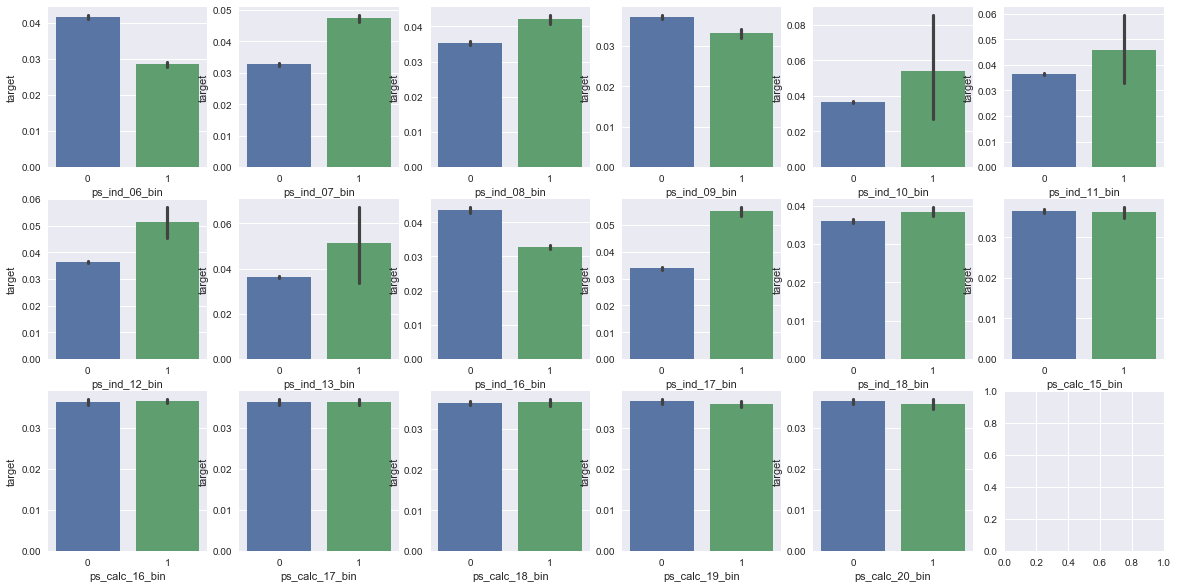

time: 6min 23s


In [23]:
plain_features = ['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin',
                  'ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin',
                  'ps_ind_12_bin','ps_ind_13_bin','ps_ind_16_bin',
                  'ps_ind_17_bin','ps_ind_18_bin','ps_calc_15_bin',
                  'ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin',
                  'ps_calc_19_bin','ps_calc_20_bin']
fig, ax = plt.subplots(nrows = 3, ncols = 6 ,figsize=(20,10))
start = 0
for j in range(3):
    for i in range(6):
        if start == len(plain_features):
            break
        sns.barplot(x=plain_features[start], y='target', data=train, ax=ax[j,i])
        start += 1

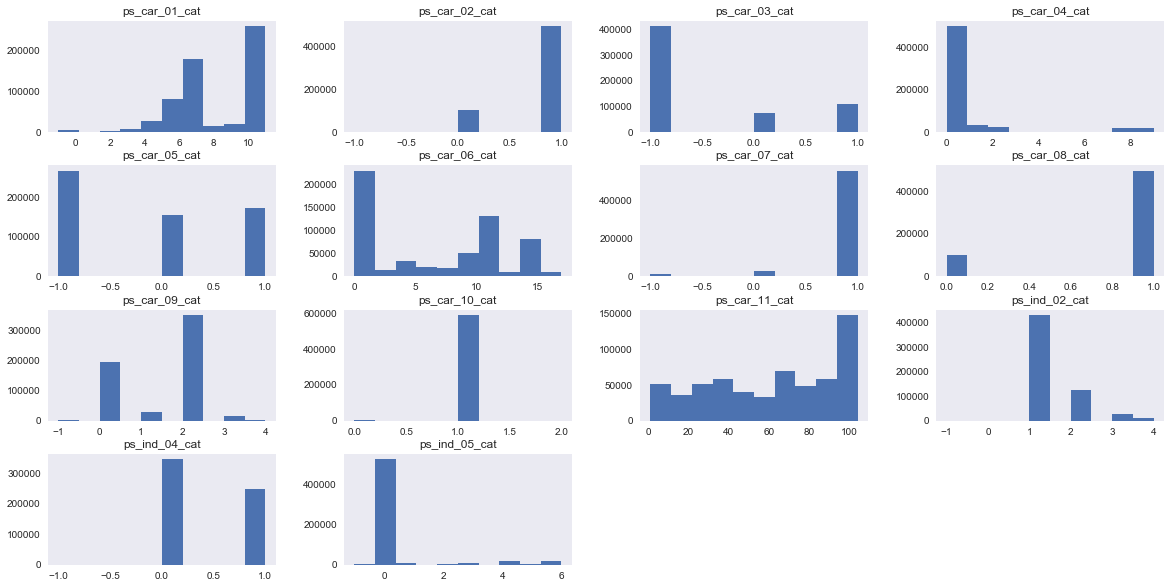

time: 4.67 s


In [37]:
train[CAT].hist(bins=10,figsize=(20,10),grid=False);

In [47]:
(train.target == 1).sum()

21694

time: 48 ms


In [50]:
train.ps_car_10_cat.value_counts()

1    590179
0      4857
2       176
Name: ps_car_10_cat, dtype: int64

time: 35 ms


In [56]:
train[['ps_car_10_cat','target']].groupby(['ps_car_10_cat'],as_index= False).sum().sort_values(by='target', ascending = False)

,ps_car_10_cat,target
1,1,21520
0,0,167
2,2,7


time: 120 ms


In [44]:
train.ps_ind_02_cat.value_counts(normalize = True)

 1    0.725555
 2    0.207612
 3    0.047355
 4    0.019116
-1    0.000363
Name: ps_ind_02_cat, dtype: float64

time: 34 ms


In [59]:
train[['ps_ind_02_cat','target']].groupby(['ps_ind_02_cat'],as_index= False).sum().sort_values(by='target', ascending = False)

,ps_ind_02_cat,target
1,1,15428
2,2,4713
3,3,1049
4,4,464
0,-1,40


time: 99 ms


In [40]:
train.ps_ind_05_cat.value_counts(normalize = True)

 0    0.887094
 6    0.034714
 4    0.030819
 1    0.013982
 3    0.013832
-1    0.009760
 2    0.007029
 5    0.002770
Name: ps_ind_05_cat, dtype: float64

time: 117 ms


In [41]:
train.ps_ind_04_cat.value_counts(normalize = True)

 0    0.582927
 1    0.416934
-1    0.000139
Name: ps_ind_04_cat, dtype: float64

time: 55 ms


In [42]:
train[['ps_ind_04_cat','target']].groupby(['ps_ind_04_cat'],as_index= False).mean().sort_values(by='target', ascending = False)

,ps_ind_04_cat,target
0,-1,0.397590
2,1,0.038644
1,0,0.034790


time: 585 ms


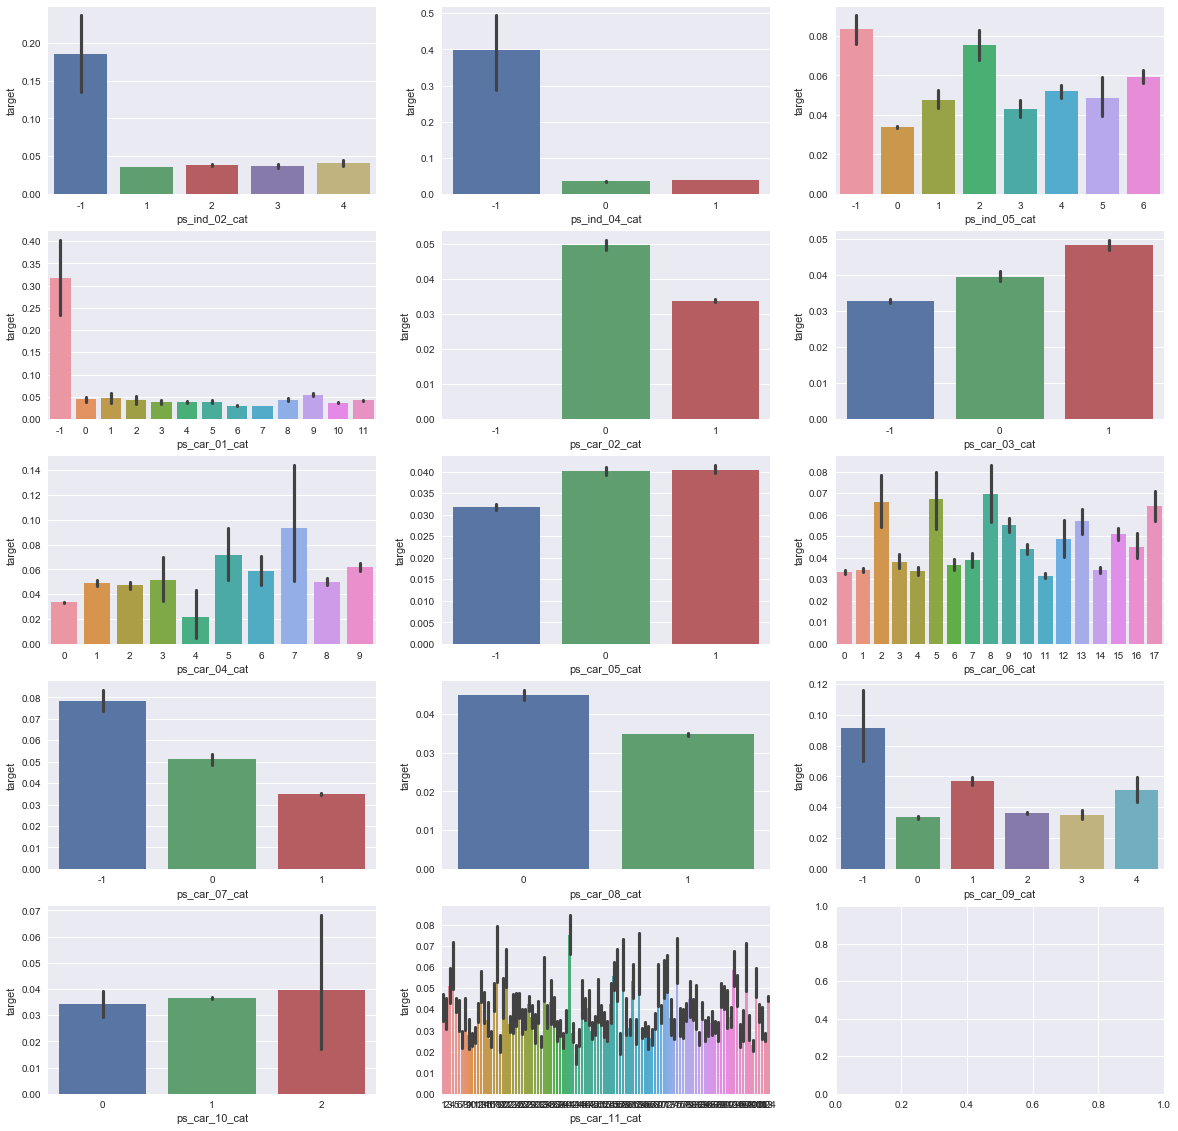

time: 4min 51s


In [29]:
plain_features = CAT
fig, ax = plt.subplots(nrows = 5, ncols = 3 ,figsize=(20,20))
start = 0
for j in range(5):
    for i in range(3):
        if start == len(plain_features):
            break
        sns.barplot(x=plain_features[start], y='target', data=train, ax=ax[j,i])
        start += 1

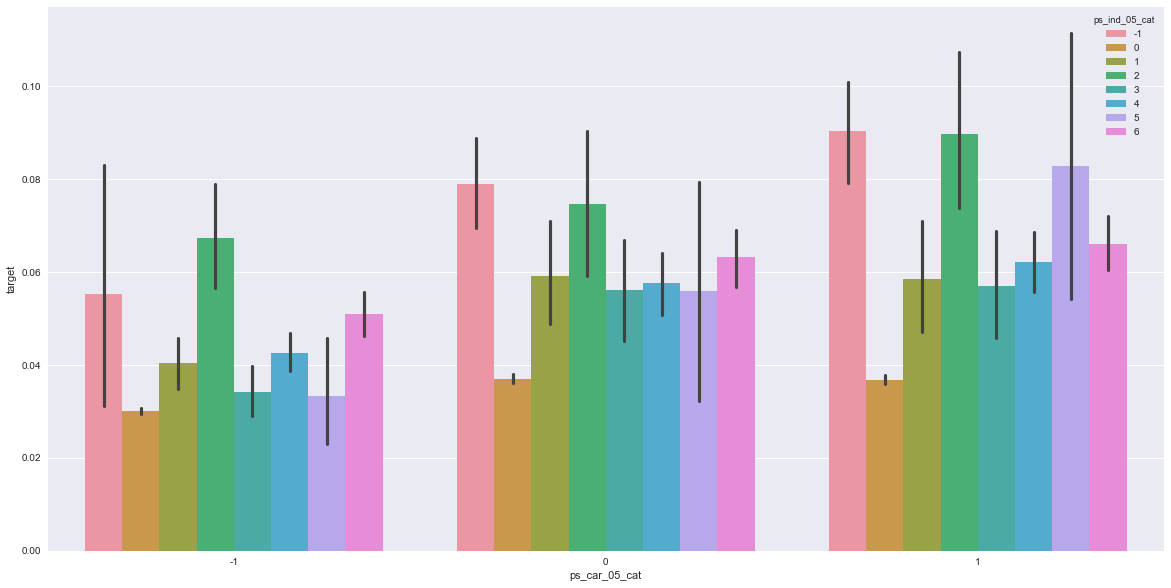

time: 22.3 s


In [48]:
plt.figure(figsize= (20,10))
sns.barplot(y="target", x = 'ps_car_05_cat', hue="ps_ind_05_cat", data=train)

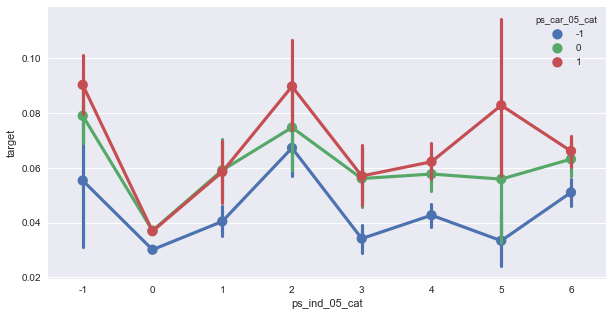

time: 24.6 s


In [52]:
plt.figure(figsize= (10,5))
sns.pointplot(x="ps_ind_05_cat", y="target", hue="ps_car_05_cat", data=train);

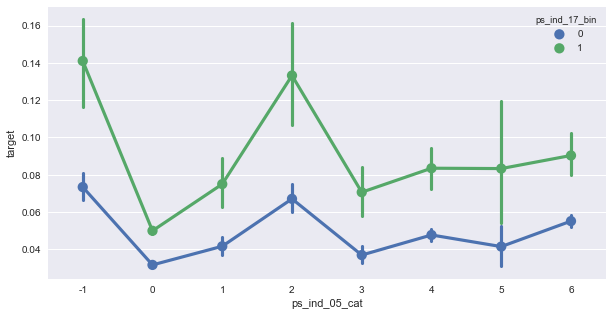

time: 16.4 s


In [56]:
plt.figure(figsize= (10,5))
sns.pointplot(x="ps_ind_05_cat", y="target", hue="ps_ind_17_bin", data=train);

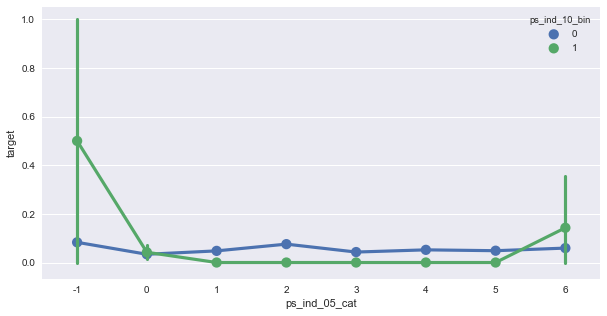

time: 33.8 s


In [12]:
plt.figure(figsize= (10,5))
sns.pointplot(x="ps_ind_05_cat", y="target", hue="ps_ind_10_bin", data=train);

## Numerical variables

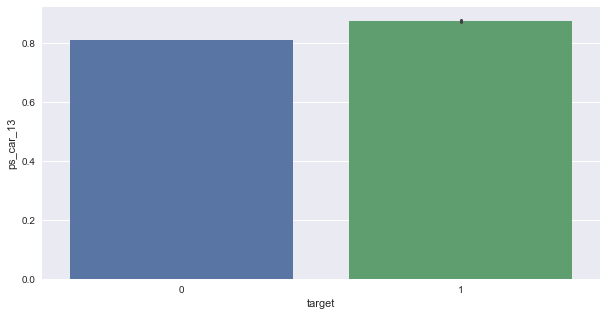

time: 28.4 s


In [60]:
plt.figure(figsize= (10,5))
sns.barplot(x="target", y = 'ps_car_13', data=train)

In [18]:
train[['ps_car_13','ps_reg_03']]

,ps_car_13,ps_reg_03
0,0.883679,0.718070
1,0.618817,0.766078
2,0.641586,-1.000000
3,0.542949,0.580948
4,0.565832,0.840759
5,0.879049,2.332649
6,0.639683,0.617454
7,0.900574,0.607248
8,0.780641,0.901388
9,1.458184,2.316652


time: 175 ms


In [24]:
(train.ps_ind_10_bin +  train.ps_ind_11_bin + train.ps_ind_12_bin + train.ps_ind_13_bin != train.ps_ind_14).mean()

0.0

time: 15.8 ms


In [45]:
d1 = train.ps_ind_06_bin +  train.ps_ind_07_bin + train.ps_ind_08_bin + train.ps_ind_09_bin

time: 5.11 ms


In [50]:
(d1 == 1).mean()

1.0

time: 12.2 ms


In [53]:
BIN

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

time: 2.62 ms


In [41]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())
    
trace1 = go.Bar( x=bin_col,
                 y=zero_list ,
                 name='Zero count'
                )
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

time: 348 ms


In [71]:
(train.ps_ind_16_bin + train.ps_ind_17_bin + train.ps_ind_18_bin + train.ps_calc_15_bin == 1).mean()

0.82889457873833183

time: 16.6 ms


In [76]:
(train.ps_calc_16_bin + train.ps_calc_19_bin + train.ps_calc_20_bin).value_counts()

1    293280
2    159838
0    122180
3     19914
dtype: int64

time: 12 ms


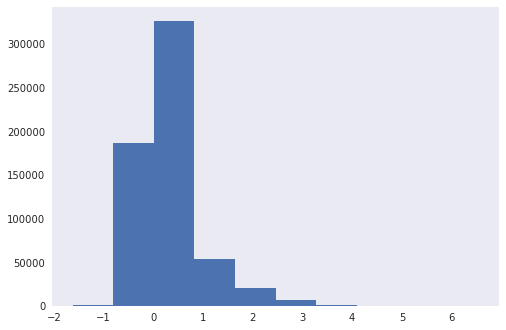

time: 354 ms


In [85]:
(train.ps_reg_01*train.ps_reg_02 * train.ps_reg_03).hist(grid = False)

In [9]:
(train[['ps_car_13','target']][train.ps_car_13 > 0.944].target == 1).mean()

0.0525679012345679

time: 26.5 ms


In [12]:
train['ps_car_15_carre'] = (train.ps_car_15)**2

time: 7.05 ms


In [15]:
train[['ps_car_15_carre','target','ps_car_13']].corr()

,ps_car_15_carre,target,ps_car_13
ps_car_15_carre,1.00000,0.029920,0.565300
target,0.02992,1.000000,0.053899
ps_car_13,0.56530,0.053899,1.000000


time: 36.8 ms


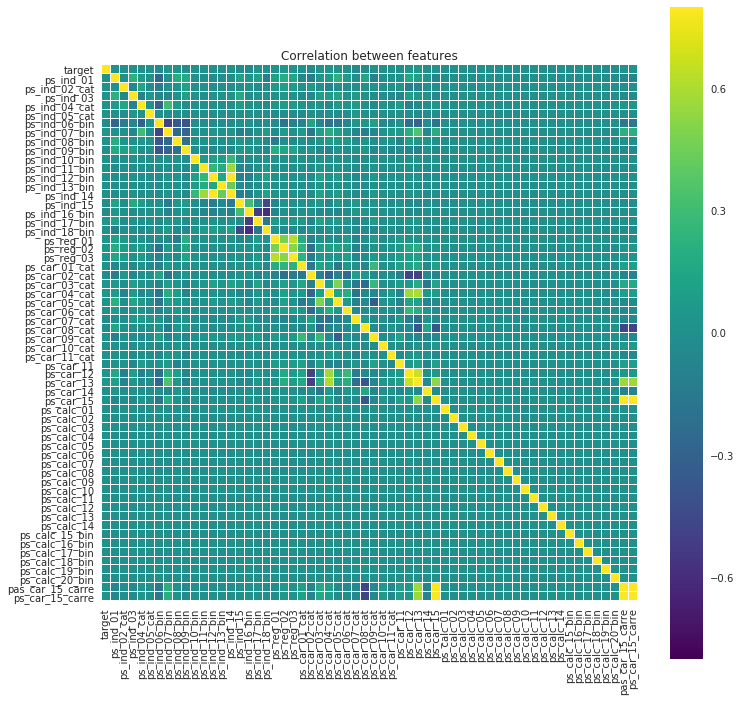

time: 7 s


In [14]:
corrMatrix = train.select_dtypes(include = ['Float64','int64']).iloc[:,1:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix,vmax = .8, linewidths = 0.01, square = True, cmap = 'viridis', linecolor ='white')
plt.title('Correlation between features')

In [17]:
train[['ps_car_15_carre','ps_car_13']].

,ps_car_15_carre,ps_car_13
0,13.0,0.883679
1,6.0,0.618817
2,11.0,0.641586
3,4.0,0.542949
4,4.0,0.565832
5,9.0,0.879049
6,10.0,0.639683
7,11.0,0.900574
8,8.0,0.780641
9,13.0,1.458184


time: 19.7 ms


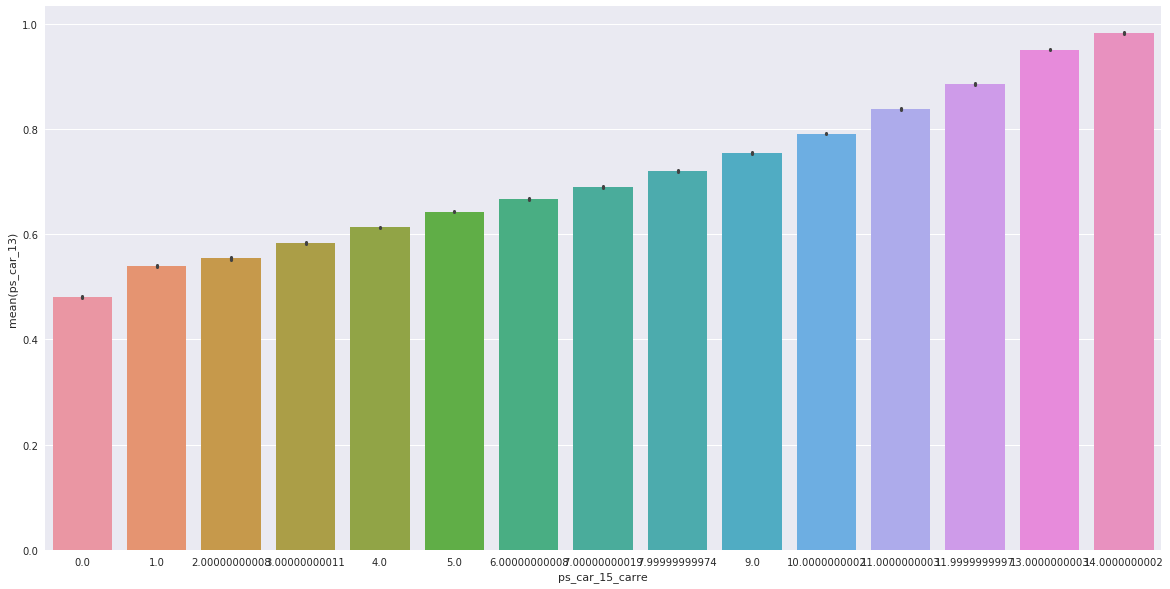

time: 15.3 s


In [21]:
plt.figure(figsize= (20,10))
sns.barplot(y="ps_car_13", x = 'ps_car_15_carre', data=train)

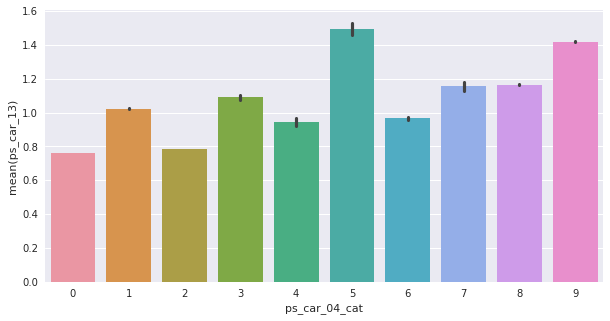

time: 23.3 s


In [25]:
plt.figure(figsize= (10,5))
sns.barplot(y="ps_car_13", x = 'ps_car_04_cat', data=train)

In [35]:
x = round(train.ps_car_12**2, 4) *10000

time: 19.5 ms


In [45]:
x.value_counts()

1000.0     170579
1600.0     111873
1400.0      98598
2000.0      49318
1800.0      49293
999.0       23646
1500.0      14098
2400.0       6238
3000.0       5869
1598.0       5191
1300.0       4475
996.0        4475
1998.0       4197
1599.0       3967
2500.0       3903
994.0        3594
1796.0       3095
1596.0       2776
2800.0       2244
3200.0       2152
1595.0       1563
1668.0       1522
3500.0       1399
2300.0       1349
1984.0       1245
1781.0       1197
1988.0        919
2700.0        918
1798.0        900
3600.0        896
            ...  
2967.0          2
2771.0          2
220.0           2
1239.0          2
4199.0          2
4892.0          1
3980.0          1
2295.0          1
1565.0          1
4196.0          1
2304.0          1
2171.0          1
2165.0          1
2164.0          1
4300.0          1
1996.0          1
1296.0          1
800.0           1
4973.0          1
1372.0          1
3498.0          1
2464.0          1
3378.0          1
5972.0          1
3164.0    

time: 53.4 ms


In [49]:
train.ps_car_11.value_counts()

 3    318919
 2    189353
 1     60952
 0     25983
-1         5
Name: ps_car_11, dtype: int64

time: 38.4 ms


In [15]:
train['ps_ind_19_bin'] = train[['ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin']].sum(axis = 1).apply(lambda x: 1 if x == 0 else 0)

time: 231 ms


In [18]:
a = train.ps_ind_16_bin.astype(str) + train.ps_ind_17_bin.astype(str) + train.ps_ind_18_bin.astype(str) + train.ps_ind_19_bin.astype(str)

time: 4.81 s


In [17]:
train[['ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_ind_19_bin']].sum(axis = 1).unique()

array([1])

time: 35.2 ms


In [19]:
a.unique()

array(['0100', '0010', '1000', '0001'], dtype=object)

time: 26.5 ms
